For this tasks I first run MLflow server in my working directory

```bash
mlflow ui --backend-store-ui sqlite:///mlflow.db
```

and run Prefect server

```bash
prefect server start
```

Download the data.

In [1]:
import os
import requests

url_list = [
    "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet"
]
data_path = "data/"

if not os.path.exists(data_path):
    os.makedirs(data_path)

for url in url_list:
    filename = url.split('/')[-1]
    print(filename)
    if not os.path.exists(data_path + filename):
        with open(data_path + filename, 'wb') as f:
            response = requests.get(url)
            f.write(response.content)
    else:
        print(filename, "already exists")


green_tripdata_2021-01.parquet
green_tripdata_2021-02.parquet


**In the development stage**, all you need to do is run the .py file which contains the defined tasks and flows.

In [2]:
%run orchestrate.py

21:09:06.994 | INFO    | prefect.engine - Created flow run 'smooth-buzzard' for flow 'main-flow'

21:09:07.041 | INFO    | Flow run 'smooth-buzzard' - View at http://127.0.0.1:4200/flow-runs/flow-run/7cd0a852-2133-4189-a486-6c8e5ebdc933

2023/06/11 21:09:18 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/06/11 21:09:18 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
2023/06/11 21:09:20 INFO mlflow.tracking.fluent: Experiment with name 'nyc-taxi-experiment' does not exist. Creating a new experiment.
INFO  [prefect.flow_runs] Created task run 'Read taxi data-0' for task 'Read taxi data'
INFO  [prefect.flow_runs] Executing 'Read taxi data-0' immediately...
INFO  [prefect.task_runs] Finished in state Completed()
INFO  [prefect.flow_runs] Created task run 'Read taxi data-1' for task 'Read taxi data'
INFO  [prefect.flow_runs] Executing 'Read taxi data-1' immediately...
INFO  [prefect.task_runs] Finished in state Completed()
INFO  [prefect.fl

### Q1. Human-readable name

Add `name` parameter to task decorator, [docs](https://docs.prefect.io/2.10.13/concepts/tasks/#:~:text=Description-,name,not%20provided%2C%20the%20name%20will%20be%20inferred%20from%20the%20function%20name.,-description).  
The name of task will be displayed in here.

![Name of task](<images/Cuplikan layar 2023-06-11 215552.png>)

**For Deployment stage**, 
1. *Initiate the Prefect project* with run the command
```bash
prefect project init
```
2. *Deploy the flow* with run the command
```bash
prefect deploy orchestrate.py:main_flow -n hw_taxi1 -p zoomcamppool
```
3. *Start the worker*
```bash
prefect worker start -p zoomcamppool
```
4. *Run the flow*
```bash
prefect deployment run main-flow/hw_taxi1
```

### Q2. Cron


5. To set the schedule
```bash
prefect deployment set-schedule --cron "0 9 3 * *" main-flow/hw_taxi1
```

![Alt text](<images/Cuplikan layar 2023-06-11 234044.png>)
![Cuplikan layar 2023-06-11 234044.png](<attachment:Cuplikan layar 2023-06-11 234044.png>)
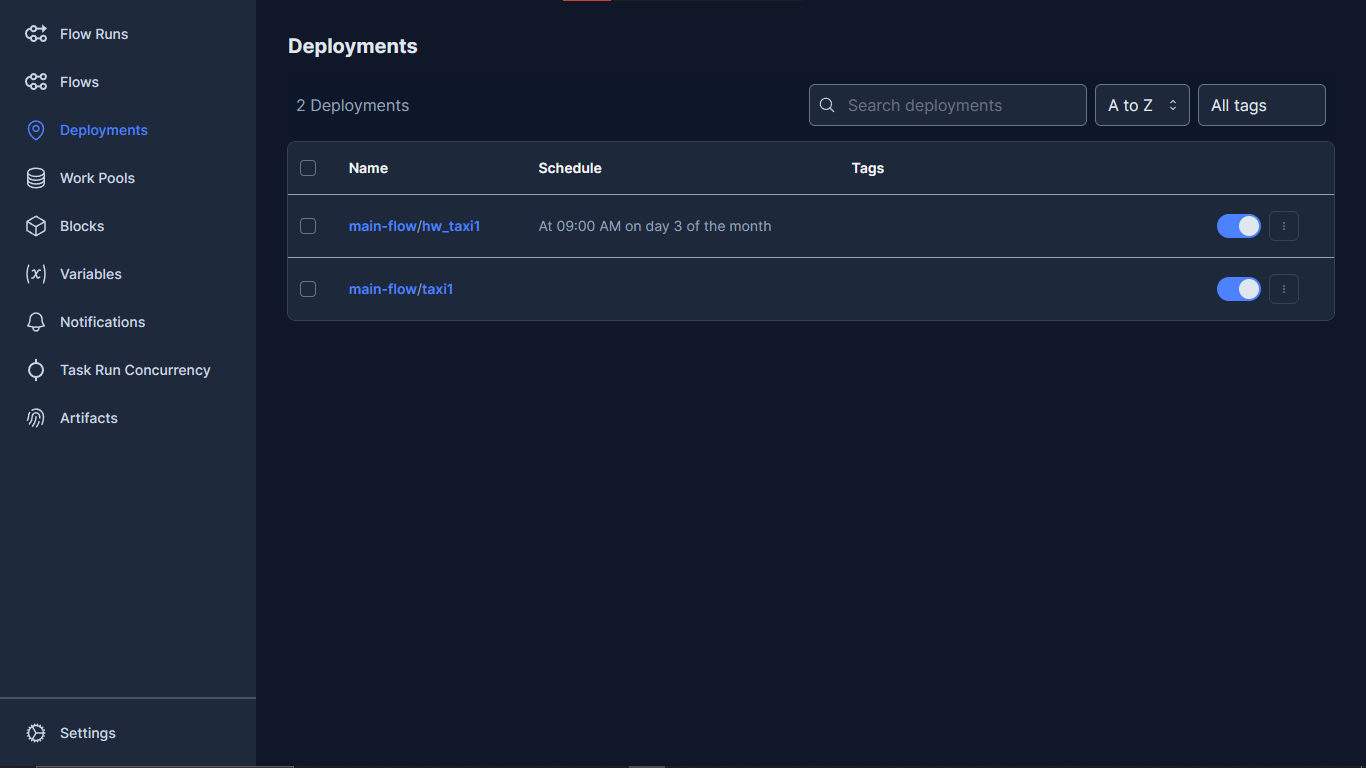

### Q3. RMSE

In [2]:
import os
import requests

url_list = [
    "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet"
]
data_path = "data/"

if not os.path.exists(data_path):
    os.makedirs(data_path)

for url in url_list:
    filename = url.split('/')[-1]
    print(filename)
    if not os.path.exists(data_path + filename):
        with open(data_path + filename, 'wb') as f:
            response = requests.get(url)
            f.write(response.content)
    else:
        print(filename, "already exists")

green_tripdata_2023-01.parquet
green_tripdata_2023-02.parquet


![Alt text](<images/Cuplikan layar 2023-06-11 235910.png>)

![Alt text](<images/Cuplikan layar 2023-06-12 000023.png>)

The last validation RMSE is 5.19931.

### Q4. RMSE (Markdown Artifact)


In [3]:
url_list = [
    "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet",
    "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet"
]
data_path = "data/"

if not os.path.exists(data_path):
    os.makedirs(data_path)

for url in url_list:
    filename = url.split('/')[-1]
    print(filename)
    if not os.path.exists(data_path + filename):
        with open(data_path + filename, 'wb') as f:
            response = requests.get(url)
            f.write(response.content)
    else:
        print(filename, "already exists")

green_tripdata_2023-03.parquet
green_tripdata_2023-02.parquet
green_tripdata_2023-02.parquet already exists


![Alt text](<images/Cuplikan layar 2023-06-12 013325.png>)

### Q5. Emails

Register the new block (prefect-email)
```bash
prefect block register -m prefect_email
```

![Alt text](<images/Cuplikan layar 2023-06-12 015438.png>)

![Alt text](<images/Cuplikan layar 2023-06-12 034254.png>)
![Alt text](<images/Cuplikan layar 2023-06-12 034439.png>)

**Notes**: If there are changes such as input and code in the flow block, it must be redeployed. If changes to the task block are not required, redeploy. This statement is based on experience. When I added the markdown artifact, I didn't redeploy, and the artifact was successfully saved. but when adding a new task block (sending notifications via email) with email input, it needs to be redeployed so that the email input can be modified in the UI.

the pre-built prefect-email task function is [`email_send_message`](https://prefecthq.github.io/prefect-email/message/#prefect_email.message.email_send_message)

### Q6. Prefect Cloud

![Alt text](<images/Cuplikan layar 2023-06-12 035825.png>)

**Notes**: When you have logged in to the prefect cloud, all activities will automatically point to the prefect cloud, no longer to the prefect local server.

![Alt text](<images/Cuplikan layar 2023-06-12 051123.png>)

In this task I encountered a problem, namely the flow that was running was in a "Late" state which was too long (compared to when it was run on a local server), so the automation of sending notifications to my email added a "cancelling" condition.